In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#Reading excel dataset into python using pandas
df = pd.read_excel("ModelingDataset.xlsx")

df.columns

Index(['employee_status', 'years_of_service', 'compa_ratio', 'age',
       'cost_to_replace_factor', 'lat', 'longi', 'salary', 'replacement_cost',
       'days_since_promotion', 'employee_type_Regular',
       'job_category_Engineering Support', 'job_category_Executive',
       'job_category_Management', 'job_category_Operations Support',
       'job_category_Professional', 'job_category_Sales Management',
       'job_category_Sales Reps', 'job_category_Service Workers',
       'job_category_Skilled Craft Workers', 'job_category_Supervisors',
       'job_category_Support', 'management_level_Executive',
       'management_level_Manager', 'management_level_Professional',
       'management_level_Supervisor', 'management_level_Support',
       'marital_status_Domestic Partner',
       'marital_status_Domestic Partner (Unregistered Marriage)',
       'marital_status_Legally Separated', 'marital_status_Living Together',
       'marital_status_Married', 'marital_status_NA', 'marital_status_S

In [ ]:
# set random seed
random_seed = 42


# Training testing split

In [ ]:
# separate features and target variable
X = df.drop('employee_status', axis=1)
y = df['employee_status']

# split data into train and test sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

# check the ratio of binary variable in train and test set
print("Ratio of binary variable in train set: ", y_train.sum() / len(y_train))
print("Ratio of binary variable in test set: ", y_test.sum() / len(y_test))


Ratio of binary variable in train set:  0.27165354330708663
Ratio of binary variable in test set:  0.2716089880268985


# Logistic Regression

In [ ]:
# train logistic regression model
clf = LogisticRegression(random_state=random_seed)
clf.fit(X_train, y_train)

# make predictions on test set
y_pred = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

Accuracy: 0.7943250779071674
Precision: 0.6775618374558304
Recall: 0.46316425120772947
Specificity: 0.9178113037604143
Confusion matrix:
[[4076  365]
 [ 889  767]]
Final Weighted Score for the model is 0.696321426977718


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("F1 score:", f1)
print("AUC score:", auc_score)

F1 score: 0.5502152080344332
AUC score: 0.6904877774840719


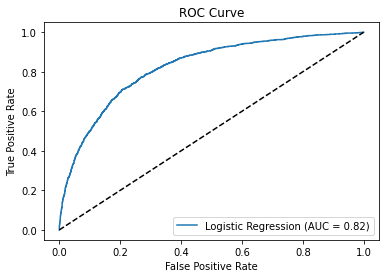

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate probabilities for each class
y_proba = clf.predict_proba(X_test)[:, 1]

# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Random Forest

In [ ]:
# train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf.fit(X_train, y_train)

# make predictions on test set
y_pred = rf.predict(X_test)

In [ ]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

Accuracy: 0.873216335902903
Precision: 0.8688387635756056
Recall: 0.6280193236714976
Specificity: 0.9646476018914659
Confusion matrix:
[[4284  157]
 [ 616 1040]]
Final Weighted Score for the model is 0.8170679709657345


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("F1 score:", f1)
print("AUC score:", auc_score)

F1 score: 0.7290571328426217
AUC score: 0.7963334627814819


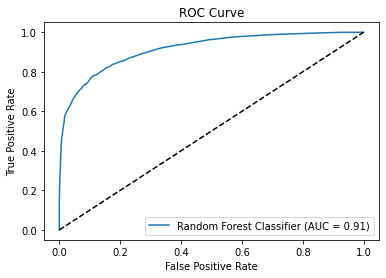

In [ ]:
# calculate probabilities for each class
y_proba = rf.predict_proba(X_test)[:, 1]

# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# plot ROC curve
plt.plot(fpr, tpr, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

# calculate feature importances
importances = rf.feature_importances_

# get the indices sorted in descending order
indices = np.argsort(importances)[::-1]  

# slice feature names and importances arrays to only include top 10 features
feature_names_sorted = [X.columns[i] for i in indices][:10]
importances_sorted = [importances[i] for i in indices][:10]

# create a bar chart of feature importances
fig = go.Figure(data=[go.Bar(x=X.columns, y=importances_sorted)])

# customize the layout
fig.update_layout(
    title='Feature Importances',
    xaxis_title='Feature',
    yaxis_title='Importance',
    yaxis_tickformat='%',
    hovermode='x'
)

# show the plot
fig.show()


# Logistic Regression - Elastic Net

In [ ]:
# train logistic regression model with L2 regularization
elasticnet = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=1000)
elasticnet.fit(X_train, y_train)

# make predictions on test set
y_pred = elasticnet.predict(X_test)

In [ ]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

Accuracy: 0.7933409873708381
Precision: 0.6752212389380531
Recall: 0.4607487922705314
Specificity: 0.9173609547399234
Confusion matrix:
[[4074  367]
 [ 893  763]]
Final Weighted Score for the model is 0.6947433726280062
